NAMA  : INTAN NUR'AULIA

NPM  : 23083010087

MATKUL : ANALISIS DATA EKSPLORATIF (A)

# Deskripsi

Dataset ini berisi daftar lengkap program studi yang ditawarkan oleh universitas di Indonesia untuk SNBT 2023 (Seleksi Nasional Berdasarkan Tes). Data ini mencakup informasi seperti nama program studi, institusi, dan kategori spesifik dari setiap program. Dataset ini membantu calon mahasiswa memahami pilihan program studi yang tersedia di berbagai universitas di Indonesia.

1. id_universitas: Ini adalah kode unik yang digunakan untuk mengidentifikasi setiap universitas. Kode ini hanya digunakan sebagai label dan tidak memiliki urutan atau nilai numerik.

2. universitas: Nama universitas adalah label yang mengidentifikasi institusi tertentu. Nama ini tidak memiliki urutan yang signifikan.

3. jenis_universitas: Kategori seperti "PTN AKADEMIK" mengklasifikasikan jenis universitas. Ini adalah kategori tanpa urutan.

4. wilayah: Menunjukkan wilayah geografis yang merupakan kategori. Tidak ada urutan yang signifikan antara wilayah-wilayah tersebut.

5. provinsi: Seperti wilayah, provinsi adalah label geografis tanpa urutan.

6. kode_prodi: Kode untuk program studi hanya berfungsi sebagai pengenal unik dan tidak memiliki urutan numerik yang berarti.

7. nama_prodi: Nama program studi juga merupakan label yang mengidentifikasi program studi tertentu.

8. jenjang: Ini menunjukkan tingkat pendidikan seperti "Sarjana," "Magister," "Doktor," dan sebagainya. Tingkatan ini memiliki urutan yang jelas dari yang lebih rendah ke yang lebih tinggi, meskipun jarak antara tingkatan tersebut tidak perlu sama.

9. daya_tampung_2024: Ini mengukur jumlah tempat yang tersedia dalam program studi tertentu. Nol berarti tidak ada tempat yang tersedia, sehingga ini adalah variabel rasio.

10. peminat: Mengukur jumlah orang yang berminat pada program studi tertentu. Nol berarti tidak ada orang yang berminat, sehingga ini juga merupakan variabel rasio.

11. portofolio: Variabel ini menunjukkan apakah program studi memerlukan portofolio atau tidak, dengan kategori seperti "Ada" atau "Tidak Ada," yang tidak memiliki urutan.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("C:\\Users\\hp\\Documents\\rekap.csv", sep=';')

print(df.head())

print(df.info())

   id_universitas              universitas jenis_universitas   wilayah  \
0             111  UNIVERSITAS SYIAH KUALA      PTN AKADEMIK  SUMATERA   
1             111  UNIVERSITAS SYIAH KUALA      PTN AKADEMIK  SUMATERA   
2             111  UNIVERSITAS SYIAH KUALA      PTN AKADEMIK  SUMATERA   
3             111  UNIVERSITAS SYIAH KUALA      PTN AKADEMIK  SUMATERA   
4             111  UNIVERSITAS SYIAH KUALA      PTN AKADEMIK  SUMATERA   

  provinsi  kode_prodi               nama_prodi  jenjang  daya_tampung_2024  \
0     ACEH      111001  PENDIDIKAN DOKTER HEWAN  Sarjana                 84   
1     ACEH      111002             TEKNIK SIPIL  Sarjana                 98   
2     ACEH      111003             TEKNIK MESIN  Sarjana                 42   
3     ACEH      111004             TEKNIK KIMIA  Sarjana                 56   
4     ACEH      111005               ARSITEKTUR  Sarjana                 56   

   peminat portofolio  
0    548.0  Tidak Ada  
1    587.0  Tidak Ada  
2    231

In [2]:
print(df.dtypes)

id_universitas         int64
universitas           object
jenis_universitas     object
wilayah               object
provinsi              object
kode_prodi             int64
nama_prodi            object
jenjang               object
daya_tampung_2024      int64
peminat              float64
portofolio            object
dtype: object


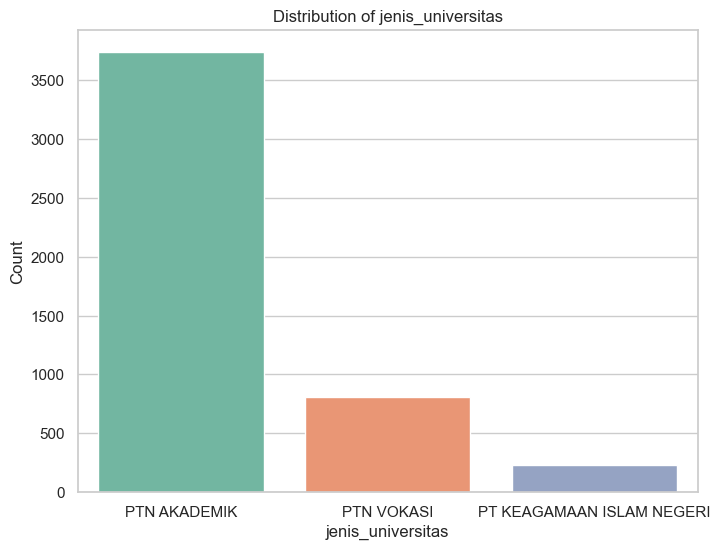

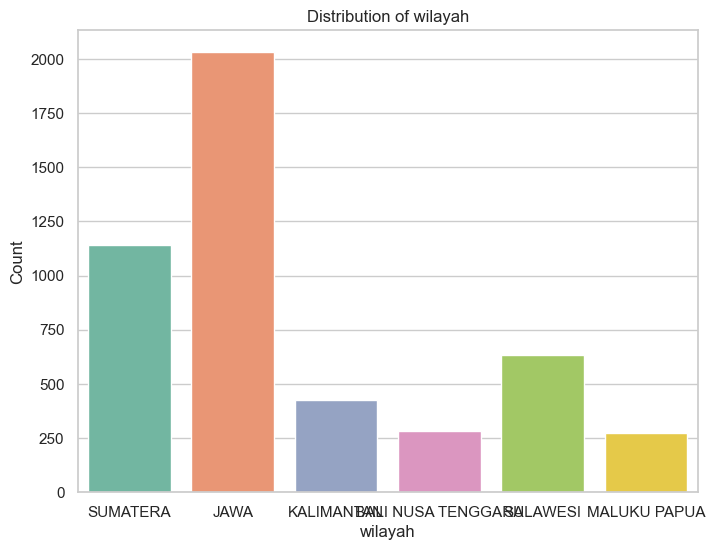

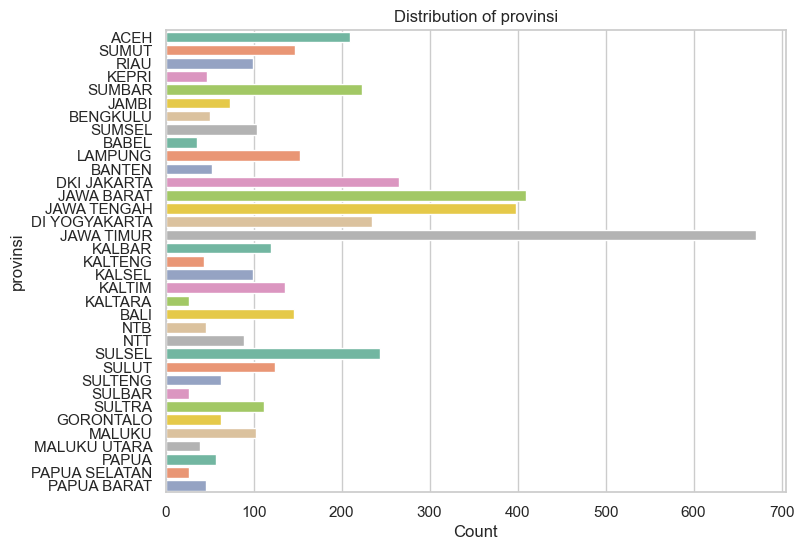

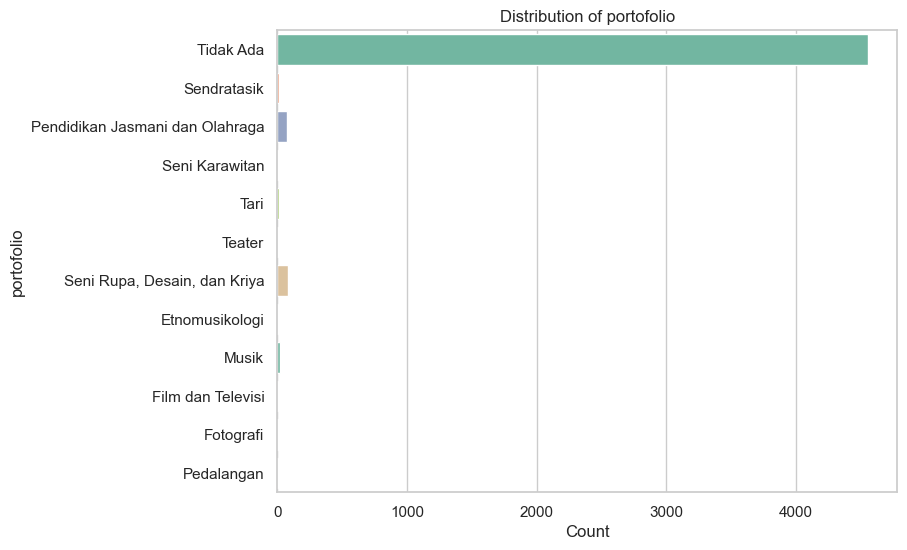

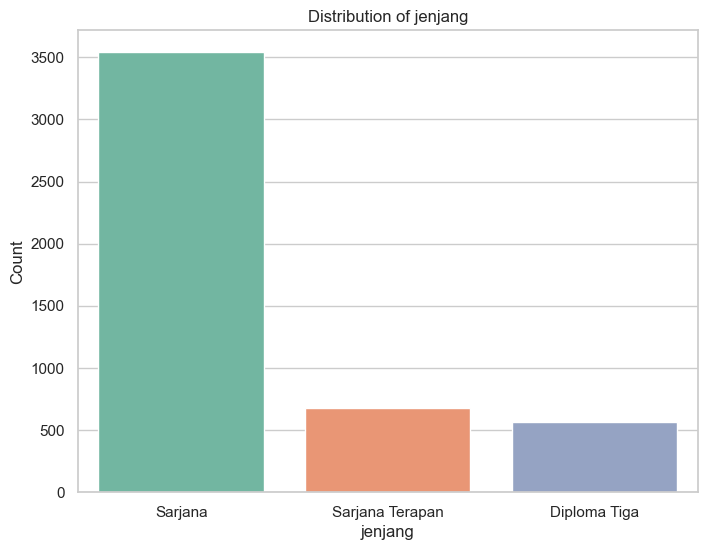

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_columns = ['jenis_universitas', 'wilayah', 'provinsi', 'portofolio', 'jenjang']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    if col == 'provinsi':
        sns.countplot(y=df[col], palette='Set2')  # Tukar X dan Y
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
        plt.xlabel('Count')
    elif col == 'portofolio':
        sns.countplot(y=df[col], palette='Set2')  # Tukar X dan Y
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
        plt.xlabel('Count')
    else:
        sns.countplot(x=df[col], palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.show()

Pada variabel jenis universiatas, wilayah, provini, portofolio, jenjang menggunakan categorical distribution. Karena Variabel-variabel tersebut bersifat kategorikal, yang berarti variabel tersebut dapat mengambil nilai tertentu tanpa urutan numerik. Misalnya, jenis universitas memiliki tiga kategori yaitu PTN Akademik, PTN Vokasi, dan PTKIN. Sedangkan untuk variabel yang lain juga memiliki beberapa kategori masing-masing.

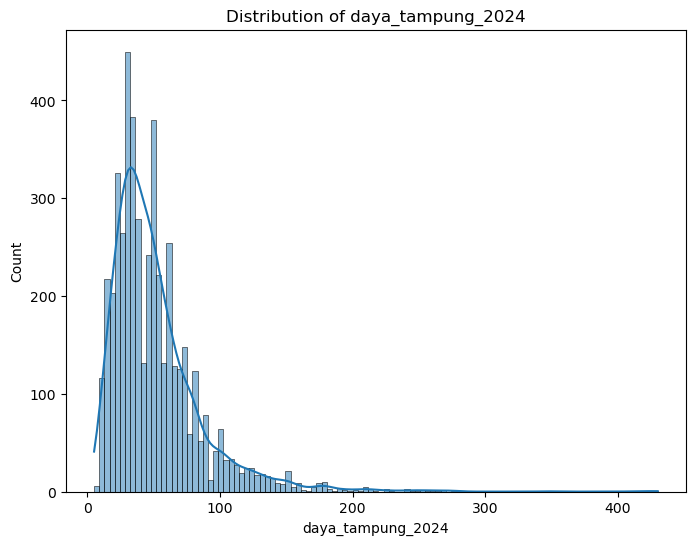

daya_tampung_2024 is categorized as Exponential distribution.

Statistics for daya_tampung_2024:
Mean: 51.547
Median: 44.000
Mode: 32.000
Variance: 1234.206
Standard Deviation: 35.131
Skewness: 2.693
Kurtosis: 14.117



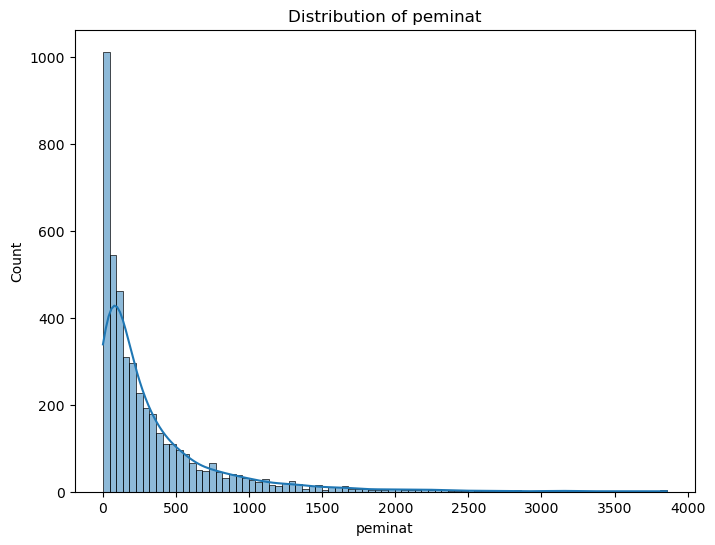

peminat is categorized as Exponential distribution.

Statistics for peminat:
Mean: 349.395
Median: 173.000
Mode: 0.000
Variance: 243760.417
Standard Deviation: 493.721
Skewness: 3.033
Kurtosis: 12.099



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("C:\\Users\\hp\\Documents\\rekap.csv", sep=';')

variables = ['daya_tampung_2024', 'peminat']

def categorize_distribution(var, data):
    k2, p = stats.normaltest(data.dropna())
    skewness = data.skew()
    kurtosis = data.kurtosis()

    if p > 0.05 and abs(skewness) < 0.5 and 2.5 < kurtosis < 3.5:
        return 'Normal'
    elif skewness > 1 and kurtosis > 3:
        return 'Exponential'
    elif abs(skewness) < 0.5 and abs(kurtosis) < 0.5:
        return 'Uniform'
    elif var == 'Outcome' or var == 'Pregnancies': 
        return 'Binomial'
    else:
        return 'Unknown'

for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

    distribution_type = categorize_distribution(var, df[var])
    print(f'{var} is categorized as {distribution_type} distribution.\n')

    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode()[0]
    variance = df[var].var()
    std_dev = df[var].std()
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()

    print(f'Statistics for {var}:')
    print(f'Mean: {mean:.3f}')
    print(f'Median: {median:.3f}')
    print(f'Mode: {mode:.3f}')
    print(f'Variance: {variance:.3f}')
    print(f'Standard Deviation: {std_dev:.3f}')
    print(f'Skewness: {skewness:.3f}')
    print(f'Kurtosis: {kurtosis:.3f}\n')

    1. Daya Tampung 2024
Eksponential Distribution: Karena daya tampung 2024 menunjukkan skewness positif, penurunan cepat setelah puncak, dan adanya kejadian langka pada nilai tinggi, data ini menunjukkan distribusi eksponensial distribusi eksponensial.

    2. Peminat
Eksponential Distribution: Sebagian besar program memiliki sedikit peminat, tetapi beberapa program dapat menarik peminat yang sangat banyak. Dalam hal ini variabel peminat menggunakan distribusi eksponensial, di mana kejadian kecil sering terjadi, tetapi kejadian besar sangat jarang terjadi.

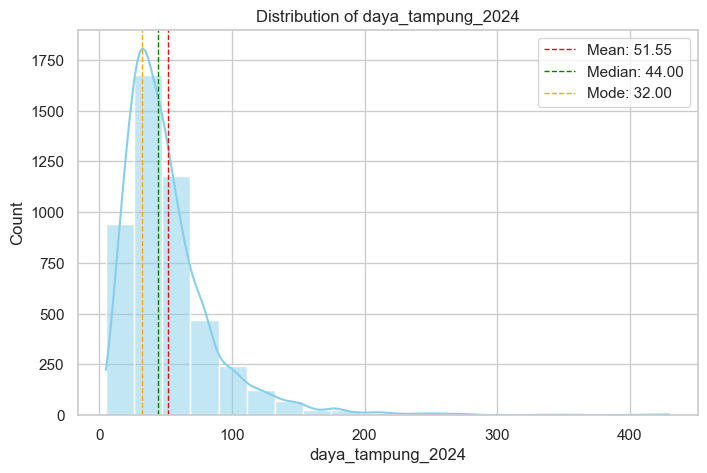

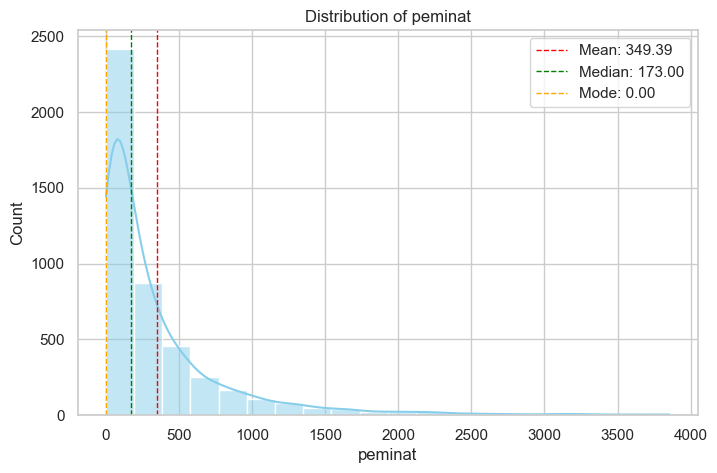


Variable: daya_tampung_2024
Mean: 51.547
Median: 44.000
Mode: 32.000
Variance: 1234.206
Standard Deviation: 35.131
Skewness: 2.693

Variable: peminat
Mean: 349.395
Median: 173.000
Mode: 0.000
Variance: 243760.417
Standard Deviation: 493.721
Skewness: 3.033


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Baca file CSV dengan benar
df = pd.read_csv("C:\\Users\\hp\\Documents\\rekap.csv", sep=';')

# Variabel yang dianalisis
variables = ['daya_tampung_2024', 'peminat']

# Dictionary untuk menyimpan hasil statistik
results = {}

# Set gaya seaborn
sns.set(style="whitegrid")

# Loop untuk tiap variabel
for var in variables:
    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode()[0]
    variance = df[var].var()
    std_dev = df[var].std()
    skewness = df[var].skew()

    # Simpan hasil statistik
    results[var] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Variance': variance,
        'Standard Deviation': std_dev,
        'Skewness': skewness
    }
    
    # Plot distribusi
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True, bins=20, color='skyblue')
    
    # Plot garis mean, median, dan mode
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode:.2f}')
    
    # Judul dan legenda
    plt.title(f'Distribution of {var}')
    plt.legend()
    plt.show()

# Print hasil statistik
for var, stat_values in results.items():
    print(f'\nVariable: {var}')
    for stat_name, value in stat_values.items():
        print(f'{stat_name}: {value:.3f}')
